# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [106]:
import pandas as pd
import numpy as np
%pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
%pip install scipy
import scipy.stats as stats

df = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
df.head()

2601.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


2607.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [107]:
# Load data
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [108]:
# 1. Print the number of duplicate rows we have in our dataframe.
df_cars = df_cars.duplicated().sum()


In [109]:
#  2. Modify our df to have all duplicate rows removed. 
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
df_cars.drop_duplicates(inplace=True)

In [110]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df_cars = df_cars.duplicated().sum()
print(df_cars)


0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [111]:
# * Which column has the most null values and how many null values does it have?
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
most_null_col = df_cars.isnull().sum().idxmax()
most_null_count = df_cars.isnull().sum().max()
print(f"Column with most nulls: {most_null_col}, Number of nulls: {most_null_count}")


Column with most nulls: Engine HP, Number of nulls: 69


In [112]:
# * Print how long our dataframe is.
print("Length of dataframe:", len(df_cars))


Length of dataframe: 11914


In [113]:
# * Remove any row that has a null value in it. 
df_cars.dropna(inplace=True)


In [114]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
df_cars.dropna(inplace=True)
print("Length of dataframe after removing nulls:", len(df_cars))


Length of dataframe after removing nulls: 11812


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

Text(0, 0.5, 'Count')

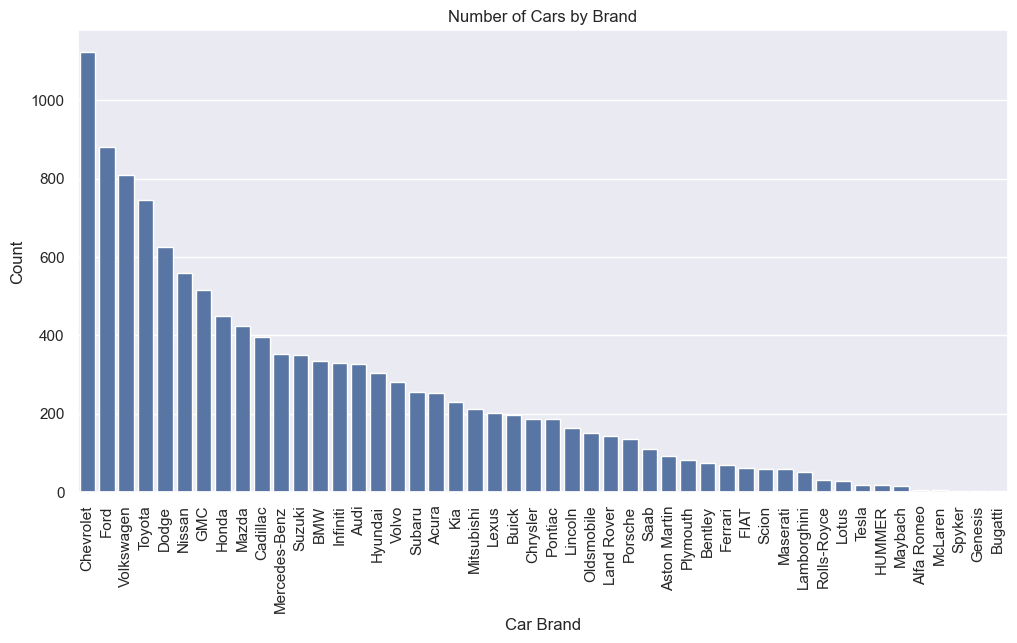

In [115]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cars, x='Make', order=df_cars['Make'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Cars by Brand')
plt.xlabel('Car Brand')
plt.ylabel('Count')



# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

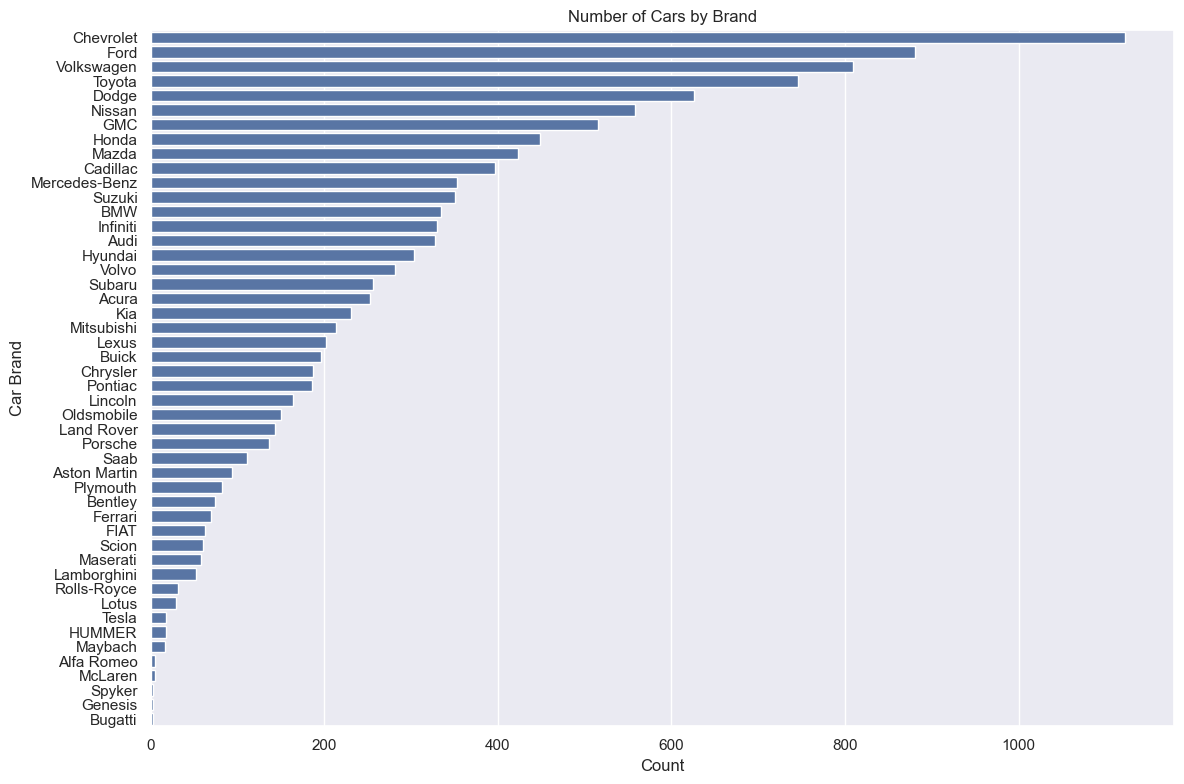

In [116]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cars, y='Make', order=df_cars['Make'].value_counts().index)
plt.title('Number of Cars by Brand')
plt.xlabel('Count')
plt.ylabel('Car Brand')
plt.tight_layout()
plt.show()

# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


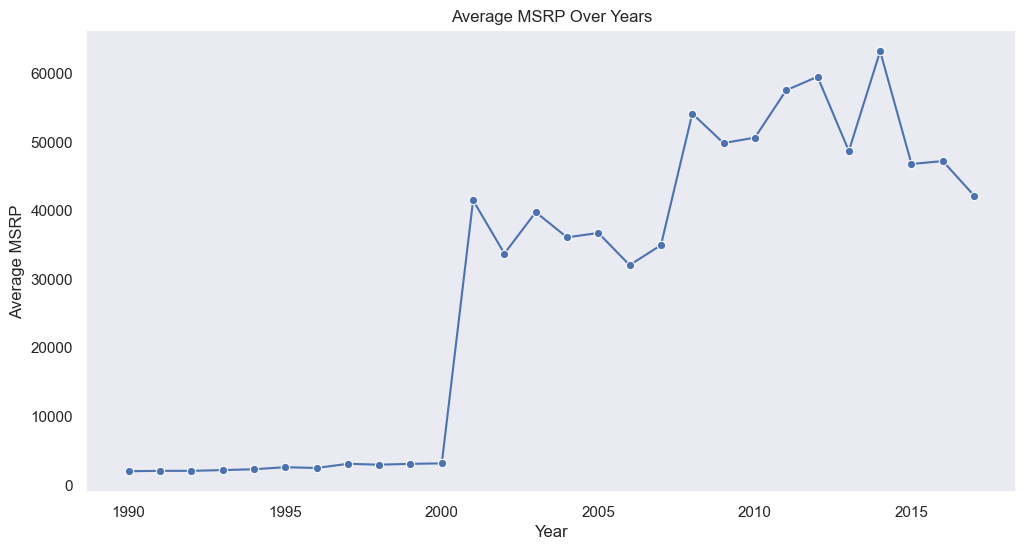

In [117]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
plt.figure(figsize=(12, 6))
avg_msrp_per_year = df_cars.groupby('Year')['MSRP'].mean().reset_index()
sns.lineplot(data=avg_msrp_per_year, x='Year', y='MSRP', marker='o')
plt.title('Average MSRP Over Years')
plt.xlabel('Year')
plt.ylabel('Average MSRP')
plt.grid()
plt.show()

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [118]:
# Make a column where is 10 when year is less than 2000, else 1.
df_cars['adjusted_price'] = np.where(df_cars['Year'] < 2000, 10, 1)

# Multiply the MSRP by the price adjuster.
df_cars['adjusted_msrp'] = df_cars['MSRP'] * df_cars['adjusted_price']


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

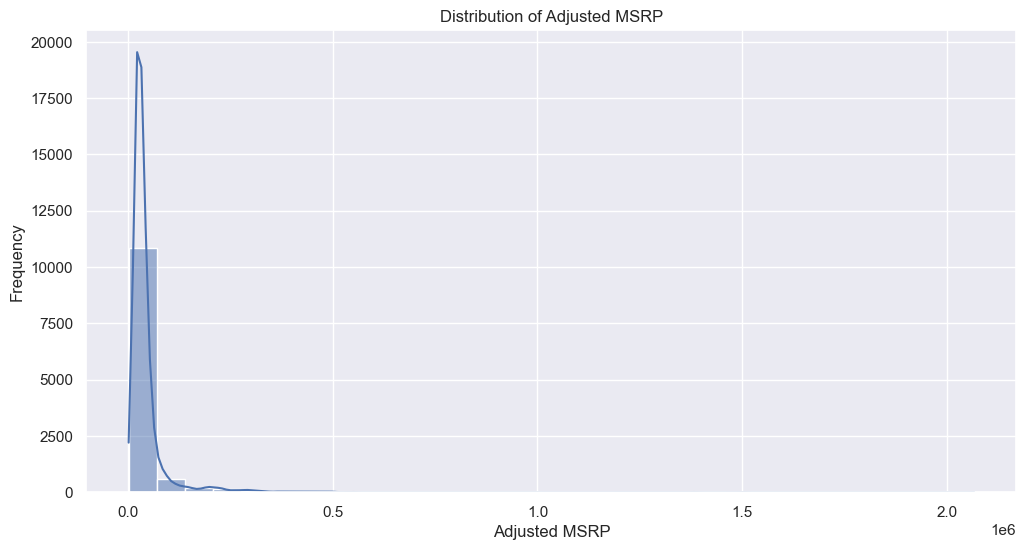

In [119]:
# Create adjusted_price and adjusted_msrp columns if not present
if 'adjusted_msrp' not in df_cars.columns:
	df_cars['adjusted_price'] = np.where(df_cars['Year'] < 2000, 10, 1)
	df_cars['adjusted_msrp'] = df_cars['MSRP'] * df_cars['adjusted_price']

# Plot new prices
plt.figure(figsize=(12, 6))
sns.histplot(df_cars['adjusted_msrp'], bins=30, kde=True)
plt.title('Distribution of Adjusted MSRP')
plt.xlabel('Adjusted MSRP')
plt.ylabel('Frequency')
plt.show()



# Plot the relationship between Engine HP and highway MPG

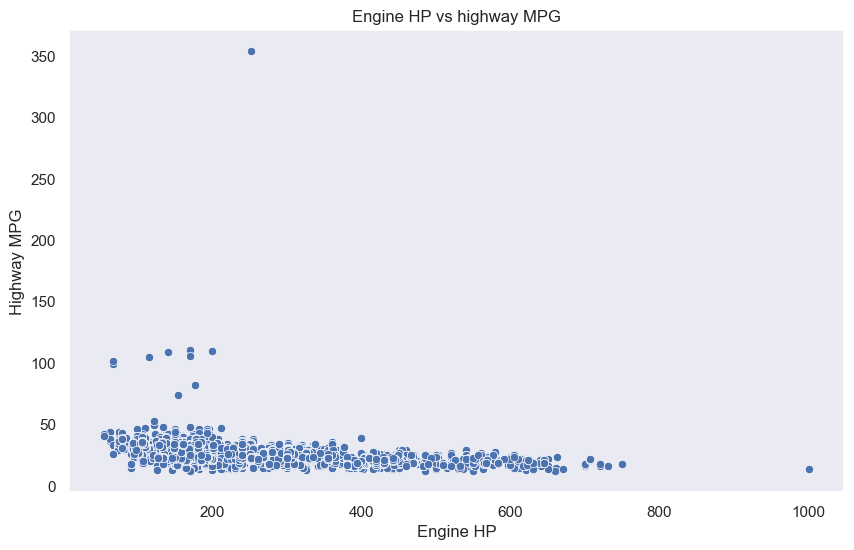

In [120]:
# Plot the relationship between Engine HP and highway MPG
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cars, x='Engine HP', y='highway MPG')               
plt.title('Engine HP vs highway MPG')
plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.grid()
plt.show()

In [121]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
df_cars = df_cars[(np.abs(stats.zscore(df_cars[['Engine HP', 'highway MPG']])) < 3).all(axis=1)]


# Replot the relationship between Engine HP and highway MPG


Rows before: 11125, after outlier removal: 10933


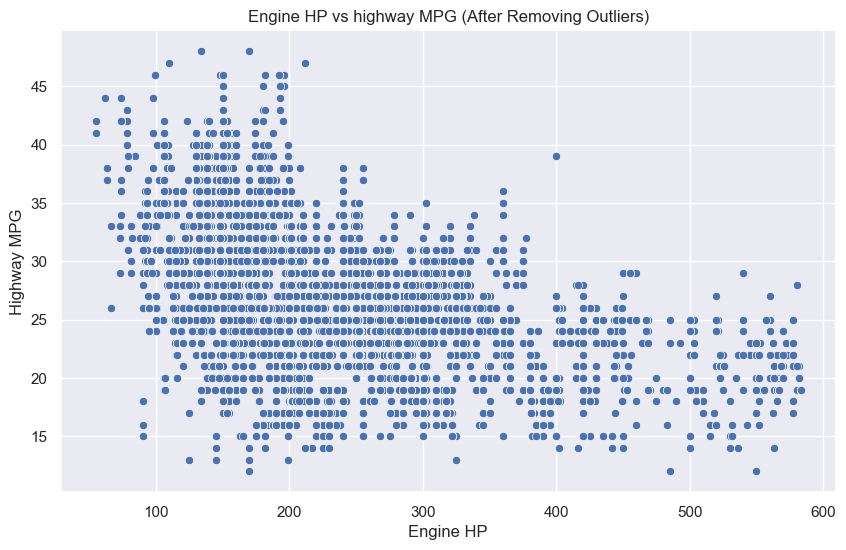

In [122]:
# Re-Plot the relationship between Engine HP and highway MPG
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
df_cars = df_cars.drop_duplicates()

cols = ['Engine HP', 'highway MPG']
df_cars = df_cars.dropna(subset=cols)  # crucial before z-score

z = np.abs(stats.zscore(df_cars[cols], nan_policy='omit'))
df_no_outliers = df_cars[(z < 3).all(axis=1)]

print(f"Rows before: {len(df_cars)}, after outlier removal: {len(df_no_outliers)}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='Engine HP', y='highway MPG')
plt.title('Engine HP vs highway MPG (After Removing Outliers)')
plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.grid(True)
plt.show()

# Make a scatter plot of Engine HP vs highway MPG

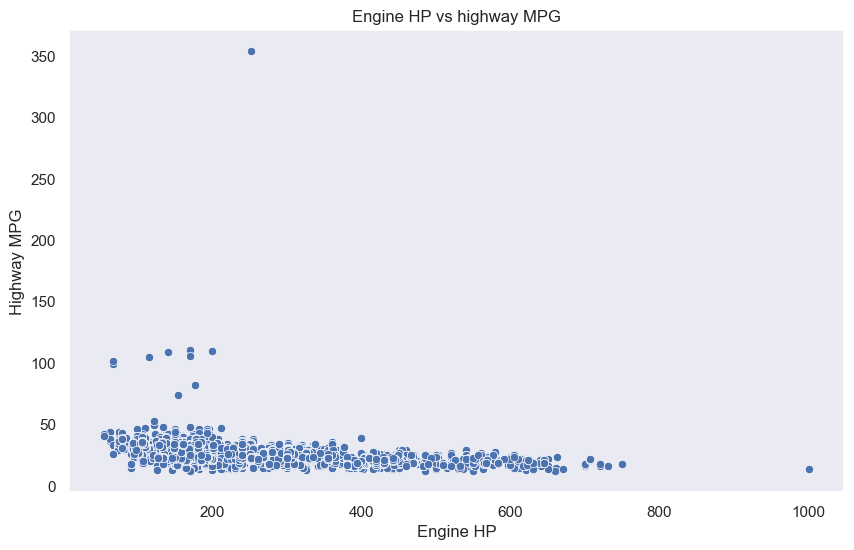

In [123]:
# Make a scatter plot of Engine HP vs highway MPG
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cars, x='Engine HP', y='highway MPG')
plt.title('Engine HP vs highway MPG')
plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.grid()
plt.show()

# What does this plot tell you about how Engine HP affects highway MPG?

In [124]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('Highway MPG and Engine HP shows a negative correlation: as HP increases, highway MPG generally decreases. After removing outliers, the downward trend is clearer (moderate strength, not perfectly linear).')

Highway MPG and Engine HP shows a negative correlation: as HP increases, highway MPG generally decreases. After removing outliers, the downward trend is clearer (moderate strength, not perfectly linear).


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

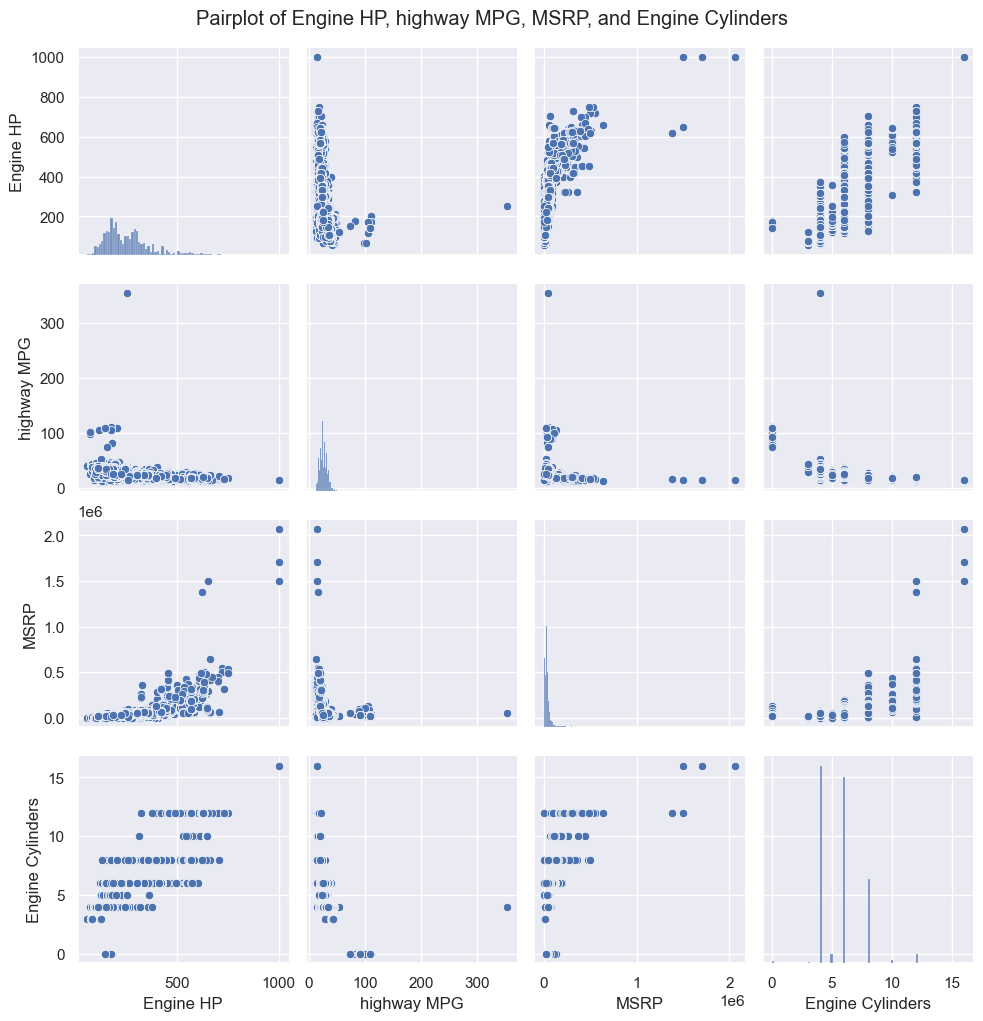

In [125]:
# Using a pairplot, display all of the linear relationship.
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
sns.pairplot(df_cars[['Engine HP', 'highway MPG', 'MSRP', 'Engine Cylinders']])
plt.suptitle('Pairplot of Engine HP, highway MPG, MSRP, and Engine Cylinders', y=1.02)
plt.show()


                  Engine HP  highway MPG  Engine Cylinders
Engine HP          1.000000    -0.406563          0.779988
highway MPG       -0.406563     1.000000         -0.621606
Engine Cylinders   0.779988    -0.621606          1.000000


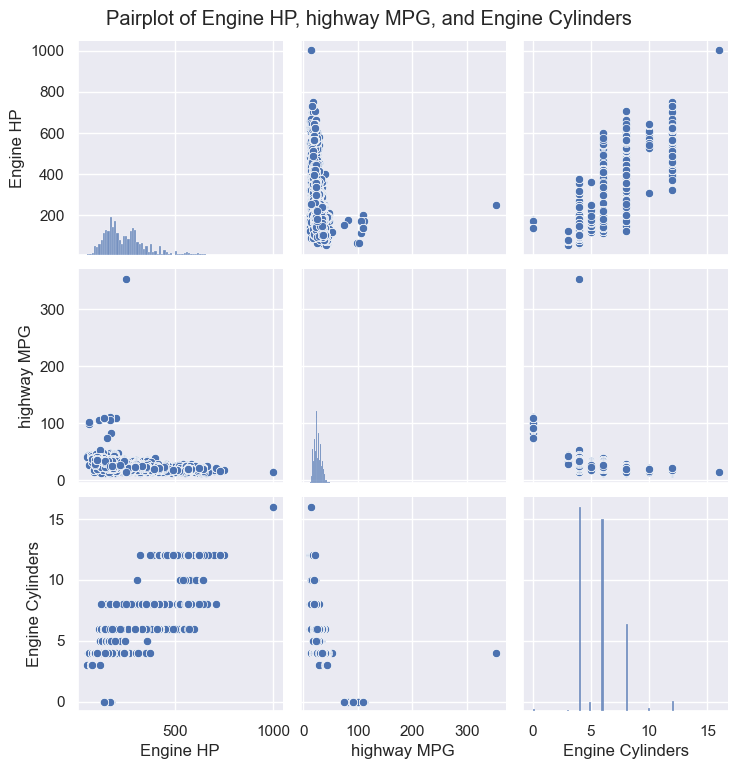

In [126]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
correlation_matrix = df_cars[['Engine HP', 'highway MPG', 'Engine Cylinders']].corr()
print(correlation_matrix)
# Engine HP and Engine Cylinders show the strongest positive correlation, while Engine HP and highway MPG show a moderate negative correlation.     
sns.pairplot(df_cars[['Engine HP', 'highway MPG', 'Engine Cylinders']])
plt.suptitle('Pairplot of Engine HP, highway MPG, and Engine Cylinders', y=1.02)
plt.show()


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

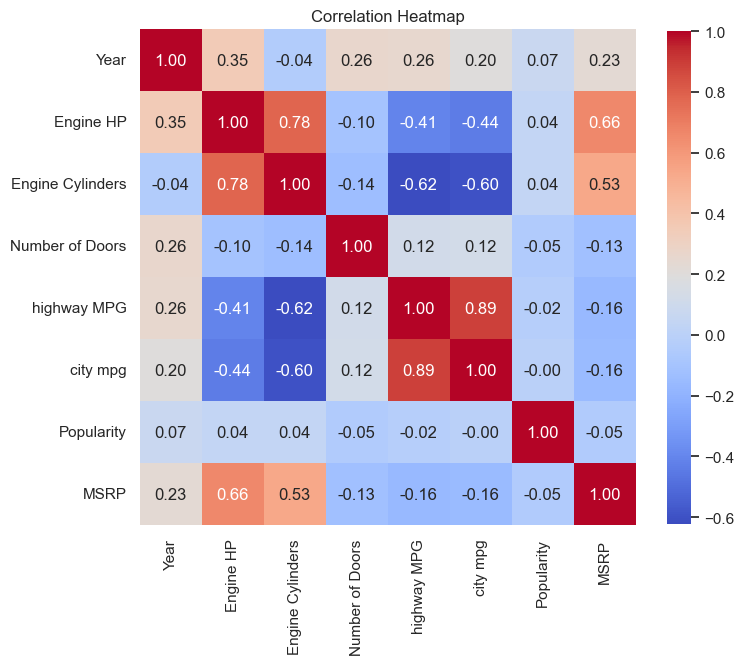

In [127]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
df_cars = pd.read_csv('/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv')
plt.figure(figsize=(8, 8))
numeric_df = df_cars.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()      




In [128]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.
print('Engine HP has the strongest relationship with Engine Cylinders, as both features are likely to influence the performance and efficiency of a vehicle. Higher engine power typically requires more cylinders to maintain performance, leading to a positive correlation between these two variables.')

Engine HP has the strongest relationship with Engine Cylinders, as both features are likely to influence the performance and efficiency of a vehicle. Higher engine power typically requires more cylinders to maintain performance, leading to a positive correlation between these two variables.


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 




Duplicates removed: 720
Rows before NaN/outlier filter: 11194
Rows after NaN/outlier filter:  10933
Pearson r:  -0.485 (linear)
Spearman ρ: -0.495 (monotonic)


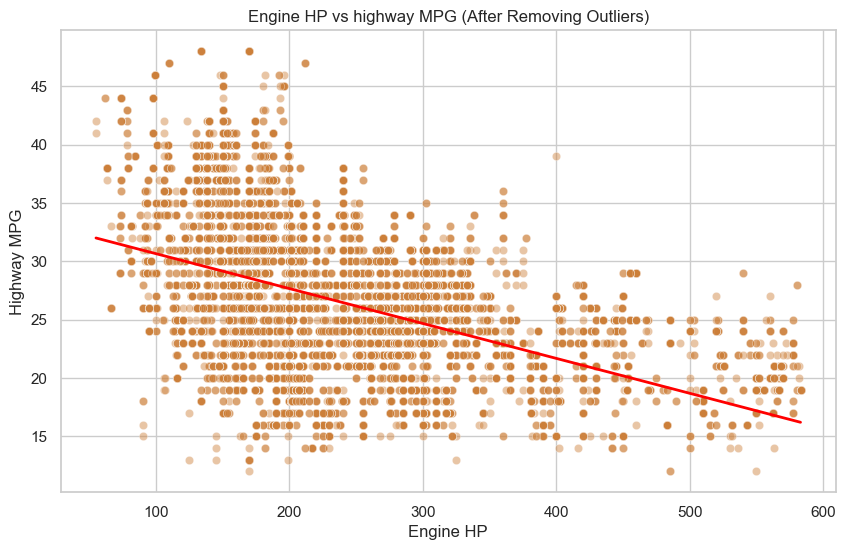

In [129]:
# Config
DATA_PATH = '/Users/test/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/cars.csv'
sns.set(style='whitegrid')

# Load and basic cleanup
df_cars = pd.read_csv(DATA_PATH)
dup_ct = df_cars.duplicated().sum()
df_cars = df_cars.drop_duplicates()

# Keep only needed columns and drop NaNs (crucial before z-score)
cols = ['Engine HP', 'highway MPG']
df_clean = df_cars.dropna(subset=cols).copy()

# Z-score outlier filter on both columns
z = np.abs(stats.zscore(df_clean[cols], nan_policy='omit'))
mask = (z < 3).all(axis=1)
df_no_outliers = df_clean.loc[mask].copy()

print(f"Duplicates removed: {dup_ct}")
print(f"Rows before NaN/outlier filter: {len(df_cars)}")
print(f"Rows after NaN/outlier filter:  {len(df_no_outliers)}")

# Correlations (quantify the relationship)
pearson = df_no_outliers[cols].corr(method='pearson').iloc[0,1]
spearman = df_no_outliers[cols].corr(method='spearman').iloc[0,1]
print(f"Pearson r:  {pearson:.3f} (linear)")
print(f"Spearman ρ: {spearman:.3f} (monotonic)")

# Scatter + regression line (no duplicate scatter)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='Engine HP', y='highway MPG', alpha=0.45, color='#cc7f39')
sns.regplot(data=df_no_outliers, x='Engine HP', y='highway MPG',
            scatter=False, ci=None, color='red', line_kws={'linewidth':2})
plt.title('Engine HP vs highway MPG (After Removing Outliers)')
plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.show()